# **Setup**

In [98]:
import yfinance as yf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Import**

In [99]:
# SP500= yf.tickers('^GSPC')
SP500_Data = yf.Ticker("^GSPC").history(period='max')
SP500_Data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-24 00:00:00-05:00,4555.839844,4560.310059,4552.799805,4559.339844,1639500000,0.0,0.0
2023-11-27 00:00:00-05:00,4554.859863,4560.520020,4546.319824,4550.430176,3403990000,0.0,0.0
2023-11-28 00:00:00-05:00,4545.549805,4568.140137,4540.509766,4554.890137,3586240000,0.0,0.0


## **Plot Closing Price**

<Axes: xlabel='Date'>

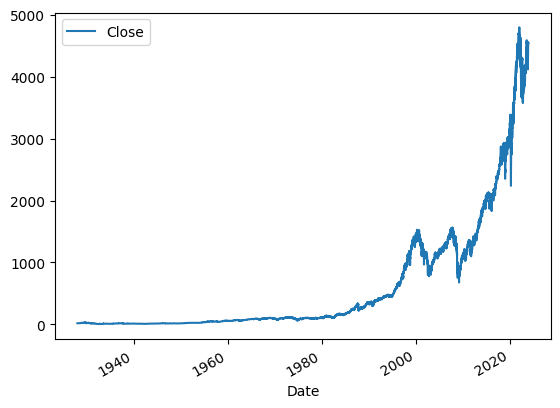

In [100]:
# Incorrect Code
# SP500_Data.plot.line(x=SP500_Data.index,y='Close')

# Correct Code
SP500_Data.plot.line(y='Close',use_index=True)

# **Data Cleaning**

In [101]:
SP500_Data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

## **Remove Cols**

In [102]:
del SP500_Data['Dividends']
del SP500_Data['Stock Splits']

In [103]:
SP500_Data.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


## **Remove Old Data**
* To factor in modern day dynamics & trends

In [104]:
print('Data Shape Before: ',SP500_Data.shape)

SP500_Data = SP500_Data.loc['1990-01-01':].copy()
print('Data Shape After: ',SP500_Data.shape)

Data Shape Before:  (24095, 5)
Data Shape After:  (8545, 5)


In [105]:
SP500_Data.head()

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000


# **Add Target Data**

In [106]:
SP500_Data['Tomorrow'] = SP500_Data['Close'].shift(-1)
SP500_Data.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995


In [107]:
# Add Variable To Indicate If the price went up or down
SP500_Data['Target'] = (SP500_Data['Tomorrow'] > SP500_Data['Close']).astype(int)
SP500_Data.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


# **Model Implementation 01**

## **Select Predictors**

In [108]:
SP500_Data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target'], dtype='object')

In [109]:
Predictors = ['Open', 'High', 'Low', 'Close', 'Volume']

## **Data Split**

In [110]:
train = SP500_Data.iloc[:-100]
print('Train Data Size: ',train.shape)

# Last 100 Rows For Testing
test = SP500_Data.iloc[-100:]
print('Test Data Size: ',test.shape)

Train Data Size:  (8445, 7)
Test Data Size:  (100, 7)


In [111]:
print('Data Shape Before: ',train.shape)
train_x = train[Predictors]
train_y = train['Target']
print(train_x.shape,train_y.shape)

Data Shape Before:  (8445, 7)
(8445, 5) (8445,)


In [112]:
print('Data Shape Before: ',test.shape)
test_x = test[Predictors]
test_y = test['Target']
print(test_x.shape,test_y.shape)

Data Shape Before:  (100, 7)
(100, 5) (100,)


## **Model 01 - Random Forest**

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

Model_01 = RandomForestClassifier(
        n_estimators=100,   # To Improve Accuracy
        min_samples_split=100, # To Control Overfitting
        random_state=1
        )

Model_01.fit(train_x,train_y)
Model_01_Pred = Model_01.predict(test_x)
precision_score(test_y,Model_01_Pred)

0.5064935064935064

## **Model 02 - Random Forest**

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

Model_02 = RandomForestClassifier(
        n_estimators=300,   # To Improve Accuracy
        min_samples_split=100, # To Control Overfitting
        random_state=1
        )

Model_02.fit(train_x,train_y)
Model_02_Pred = Model_02.predict(test_x)
precision_score(test_y,Model_02_Pred)

0.5066666666666667

# **Feature Engineering**

In [115]:
# Take Rolling Mean
SP500_Data.rolling(5).mean()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,355.944006,357.790002,352.930011,356.022009,1.660080e+08,354.008008,0.2
...,...,...,...,...,...,...,...
2023-11-24 00:00:00-05:00,4533.779980,4549.622070,4526.675879,4543.109961,3.123084e+09,4550.391992,0.6
2023-11-27 00:00:00-05:00,4542.841992,4557.702051,4536.007812,4550.391992,3.048434e+09,4551.894043,0.6
2023-11-28 00:00:00-05:00,4549.611914,4559.908105,4542.037793,4551.894043,3.036724e+09,4554.372070,0.6


## **Rolling Avg**

In [116]:
Time_Windows = [2,3,5,10,30,60,90,180,270,365,730,1095]
New_Predictors = []

for Time_Window in Time_Windows:
    Rolling_Avg = SP500_Data.rolling(Time_Window).mean()
    SP500_Data[f'CR_{Time_Window}Days'] = SP500_Data['Close']/Rolling_Avg['Close']
    New_Predictors += [f'CR_{Time_Window}Days']

In [117]:
SP500_Data.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,CR_2Days,CR_3Days,CR_5Days,CR_10Days,CR_30Days,CR_60Days,CR_90Days,CR_180Days,CR_270Days,CR_365Days,CR_730Days,CR_1095Days
Date,,,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.993381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.990597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,0.999727,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
print(New_Predictors)

['CR_2Days', 'CR_3Days', 'CR_5Days', 'CR_10Days', 'CR_30Days', 'CR_60Days', 'CR_90Days', 'CR_180Days', 'CR_270Days', 'CR_365Days', 'CR_730Days', 'CR_1095Days']


## **Trend**

In [119]:
for Time_Window in Time_Windows:
    SP500_Data[f'Trend_{Time_Window}Days'] = SP500_Data.shift(1).rolling(Time_Window).sum()['Target']
    New_Predictors += [f'Trend_{Time_Window}Days']

In [120]:
SP500_Data.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,CR_2Days,CR_3Days,CR_5Days,...,Trend_5Days,Trend_10Days,Trend_30Days,Trend_60Days,Trend_90Days,Trend_180Days,Trend_270Days,Trend_365Days,Trend_730Days,Trend_1095Days
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.993381,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.990597,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,0.999727,0.993731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
print(New_Predictors)

['CR_2Days', 'CR_3Days', 'CR_5Days', 'CR_10Days', 'CR_30Days', 'CR_60Days', 'CR_90Days', 'CR_180Days', 'CR_270Days', 'CR_365Days', 'CR_730Days', 'CR_1095Days', 'Trend_2Days', 'Trend_3Days', 'Trend_5Days', 'Trend_10Days', 'Trend_30Days', 'Trend_60Days', 'Trend_90Days', 'Trend_180Days', 'Trend_270Days', 'Trend_365Days', 'Trend_730Days', 'Trend_1095Days']


## **Remove Missing Values**

In [122]:
print('Data Shape Before: ',SP500_Data.shape)
SP500_Data.dropna(inplace=True)
print('Data Shape After: ',SP500_Data.shape)

Data Shape Before:  (8545, 31)
Data Shape After:  (7449, 31)


# **Model Implementation 02**

In [123]:
SP500_Data.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,CR_2Days,CR_3Days,CR_5Days,...,Trend_5Days,Trend_10Days,Trend_30Days,Trend_60Days,Trend_90Days,Trend_180Days,Trend_270Days,Trend_365Days,Trend_730Days,Trend_1095Days
Date,,,,,,,,,,,,,,,,,,,,,
1994-05-02 00:00:00-04:00,450.910004,453.570007,449.049988,453.019989,296130000,453.029999,1,1.002334,1.004457,1.003318,...,3.0,5.0,12.0,29.0,47.0,95.0,141.0,187.0,370.0,561.0
1994-05-03 00:00:00-04:00,453.059998,453.980011,450.510010,453.029999,288270000,451.720001,0,1.000011,1.001570,1.003198,...,3.0,6.0,12.0,30.0,47.0,95.0,141.0,187.0,370.0,562.0
1994-05-04 00:00:00-04:00,453.040009,453.109985,449.869995,451.720001,267940000,451.380005,0,0.998552,0.998078,1.000363,...,3.0,5.0,12.0,30.0,46.0,94.0,141.0,186.0,369.0,562.0
1994-05-05 00:00:00-04:00,451.720001,452.820007,450.720001,451.380005,255690000,447.820007,0,0.999624,0.998533,0.998602,...,3.0,5.0,11.0,29.0,45.0,93.0,140.0,186.0,369.0,562.0
1994-05-06 00:00:00-04:00,451.369995,451.369995,445.640015,447.820007,291910000,442.320007,0,0.996041,0.994478,0.992082,...,2.0,4.0,11.0,29.0,44.0,92.0,139.0,185.0,369.0,561.0


## **New Predictors Data**

In [124]:
print('No. Of New Predictors: ',len(New_Predictors))
print(New_Predictors)

No. Of New Predictors:  24
['CR_2Days', 'CR_3Days', 'CR_5Days', 'CR_10Days', 'CR_30Days', 'CR_60Days', 'CR_90Days', 'CR_180Days', 'CR_270Days', 'CR_365Days', 'CR_730Days', 'CR_1095Days', 'Trend_2Days', 'Trend_3Days', 'Trend_5Days', 'Trend_10Days', 'Trend_30Days', 'Trend_60Days', 'Trend_90Days', 'Trend_180Days', 'Trend_270Days', 'Trend_365Days', 'Trend_730Days', 'Trend_1095Days']


In [129]:
train_02 = SP500_Data.iloc[:-100]
print('Train Data Size: ',train_02.shape)

# Last 100 Rows For Testing
test_02 = SP500_Data.iloc[-100:]
print('Test Data Size: ',test_02.shape)

Train Data Size:  (7349, 31)
Test Data Size:  (100, 31)


## **Model 03 - Random Forest**

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

Model_03 = RandomForestClassifier(
        n_estimators=300,   # To Improve Accuracy
        min_samples_split=50, # To Control Overfitting
        random_state=1
        )

# Fit Model
Model_03.fit(train_02[New_Predictors],train_02['Target'])

# Prediction
Model_03_Pred = Model_03.predict_proba(test_02[New_Predictors])[:,1]
# print(Model_03_Pred[0:100])

# Apply Probability Threshold
Model_03_Pred_Prob_Threshold = 0.55
Model_03_Pred[Model_03_Pred >= Model_03_Pred_Prob_Threshold] = 1    # Manually Specify The Threshold 
Model_03_Pred[Model_03_Pred < Model_03_Pred_Prob_Threshold] = 0    # Manually Specify The Threshold 
# Model_03_Pred

precision_score(test_02['Target'],Model_03_Pred)

0.5277777777777778

In [197]:
Model_03_Result_Summary = pd.DataFrame({'Features':Model_03.feature_names_in_,'Importance':Model_03.feature_importances_})
Model_03_Result_Summary.sort_values(by='Importance',ascending=True,inplace=True)
Model_03_Result_Summary

,Features,Importance
12,Trend_2Days,0.005646
14,Trend_5Days,0.014401
13,Trend_3Days,0.014893
15,Trend_10Days,0.019584
16,Trend_30Days,0.023028
18,Trend_90Days,0.025996
17,Trend_60Days,0.027051
19,Trend_180Days,0.030733
20,Trend_270Days,0.031547
21,Trend_365Days,0.034761


# **Future Scope**

* Add Other Indices That Operate In Preceding Timezones
* Add News
* Add Key Component Stocks & their respective trends
* Include Hourly or Minute Level Data (High Resolution)